# **Pre-Procesing and Prediction Wind Turbine ✴ Power Production**

### Import Libary and Preview Dataset

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar
import statistics
import statsmodels.api as sm

import os
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'pandas'

In [2]:
# Import data
dfs = pd.read_excel('dataset/data (1.1.2022-1.5.2024).xlsx')

In [3]:
# Preview data
dfs

,PCTimeStamp,WTG01_Ambient WindSpeed Avg. (1),WTG02_Ambient WindSpeed Avg. (2),WTG03_Ambient WindSpeed Avg. (3),WTG04_Ambient WindSpeed Avg. (4),WTG05_Ambient WindSpeed Avg. (5),WTG06_Ambient WindSpeed Avg. (6),WTG07_Ambient WindSpeed Avg. (7),WTG01_Ambient WindDir Absolute Avg. (8),WTG02_Ambient WindDir Absolute Avg. (9),...,WTG05_Grid Production Power Avg. (26),WTG06_Grid Production Power Avg. (27),WTG07_Grid Production Power Avg. (28),WTG01_Avg. direction (29),WTG02_Avg. direction (30),WTG03_Avg. direction (31),WTG04_Avg. direction (32),WTG05_Avg. direction (33),WTG06_Avg. direction (34),WTG07_Avg. direction (35)
0,2022-01-01 00:00:00,14.200,14.300,13.300,14.300,15.100,15.100,15.800,359.000,326.100,...,4097.300,4097.200,4095.400,0.100,327.900,322.500,331.600,341.500,328.500,333.300
1,2022-01-01 00:10:00,15.300,14.600,13.400,14.300,14.500,15.000,14.600,1.100,328.400,...,4097.000,4095.500,4099.300,359.000,327.900,325.300,333.300,344.600,331.200,333.300
2,2022-01-01 00:20:00,13.800,13.500,13.600,13.700,14.700,14.500,14.800,3.000,330.400,...,4091.700,4093.800,4091.800,2.200,330.900,328.400,333.300,344.500,331.200,336.300
3,2022-01-01 00:30:00,14.100,14.900,14.900,15.000,14.200,14.500,14.100,4.200,331.600,...,4095.200,4092.000,4093.300,3.900,331.300,326.900,333.300,349.000,331.200,337.400
4,2022-01-01 00:40:00,14.200,14.200,13.800,14.200,13.800,15.100,14.700,2.300,329.100,...,4088.300,4090.800,4084.700,1.900,330.900,326.900,333.300,343.800,331.200,335.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122683,2024-05-01 23:10:00,6.406,6.422,6.508,6.379,3.875,4.410,5.215,116.970,88.014,...,297.088,423.424,694.720,114.256,85.384,81.104,88.881,97.218,86.223,94.700
122684,2024-05-01 23:20:00,6.680,6.465,6.680,6.668,3.891,4.371,5.512,116.494,87.566,...,292.928,373.376,785.728,114.480,87.063,82.754,93.805,100.268,88.014,93.553
122685,2024-05-01 23:30:00,6.254,6.555,6.539,6.734,4.133,4.578,5.719,118.284,91.903,...,311.424,446.080,886.976,115.571,93.609,84.853,94.868,101.219,90.000,96.323
122686,2024-05-01 23:40:00,5.793,6.789,6.379,6.629,3.859,4.371,5.973,119.963,95.875,...,243.840,363.264,872.640,122.817,97.274,83.957,93.553,109.836,96.183,100.268


In [4]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122688 entries, 0 to 122687
Data columns (total 36 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   PCTimeStamp                               122688 non-null  datetime64[ns]
 1   WTG01_Ambient WindSpeed Avg. (1)          122163 non-null  float64       
 2   WTG02_Ambient WindSpeed Avg. (2)          122335 non-null  float64       
 3   WTG03_Ambient WindSpeed Avg. (3)          122342 non-null  float64       
 4   WTG04_Ambient WindSpeed Avg. (4)          122337 non-null  float64       
 5   WTG05_Ambient WindSpeed Avg. (5)          122107 non-null  float64       
 6   WTG06_Ambient WindSpeed Avg. (6)          122205 non-null  float64       
 7   WTG07_Ambient WindSpeed Avg. (7)          122255 non-null  float64       
 8   WTG01_Ambient WindDir Absolute Avg. (8)   121464 non-null  float64       
 9   WTG02_Ambient W

---
## **PRE-PROCESSING**
---

### **1. Structuring Time Series & Extract new features from the PCTimeStamp Column**

In [5]:
# Structuring Time Series
dfs['PCTimeStamp'] = pd.to_datetime(dfs['PCTimeStamp']) 
dfs.sort_values(by=['PCTimeStamp'], inplace=True, ascending=True) #Above line will sort the values according to dates

# Convert all columns to float64, except 'TimeStamp'
cols = dfs.columns.drop('PCTimeStamp')
dfs[cols] = dfs[cols].apply(pd.to_numeric, errors='coerce')

In [6]:
dfs

,PCTimeStamp,WTG01_Ambient WindSpeed Avg. (1),WTG02_Ambient WindSpeed Avg. (2),WTG03_Ambient WindSpeed Avg. (3),WTG04_Ambient WindSpeed Avg. (4),WTG05_Ambient WindSpeed Avg. (5),WTG06_Ambient WindSpeed Avg. (6),WTG07_Ambient WindSpeed Avg. (7),WTG01_Ambient WindDir Absolute Avg. (8),WTG02_Ambient WindDir Absolute Avg. (9),...,WTG05_Grid Production Power Avg. (26),WTG06_Grid Production Power Avg. (27),WTG07_Grid Production Power Avg. (28),WTG01_Avg. direction (29),WTG02_Avg. direction (30),WTG03_Avg. direction (31),WTG04_Avg. direction (32),WTG05_Avg. direction (33),WTG06_Avg. direction (34),WTG07_Avg. direction (35)
0,2022-01-01 00:00:00,14.200,14.300,13.300,14.300,15.100,15.100,15.800,359.000,326.100,...,4097.300,4097.200,4095.400,0.100,327.900,322.500,331.600,341.500,328.500,333.300
1,2022-01-01 00:10:00,15.300,14.600,13.400,14.300,14.500,15.000,14.600,1.100,328.400,...,4097.000,4095.500,4099.300,359.000,327.900,325.300,333.300,344.600,331.200,333.300
2,2022-01-01 00:20:00,13.800,13.500,13.600,13.700,14.700,14.500,14.800,3.000,330.400,...,4091.700,4093.800,4091.800,2.200,330.900,328.400,333.300,344.500,331.200,336.300
3,2022-01-01 00:30:00,14.100,14.900,14.900,15.000,14.200,14.500,14.100,4.200,331.600,...,4095.200,4092.000,4093.300,3.900,331.300,326.900,333.300,349.000,331.200,337.400
4,2022-01-01 00:40:00,14.200,14.200,13.800,14.200,13.800,15.100,14.700,2.300,329.100,...,4088.300,4090.800,4084.700,1.900,330.900,326.900,333.300,343.800,331.200,335.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122683,2024-05-01 23:10:00,6.406,6.422,6.508,6.379,3.875,4.410,5.215,116.970,88.014,...,297.088,423.424,694.720,114.256,85.384,81.104,88.881,97.218,86.223,94.700
122684,2024-05-01 23:20:00,6.680,6.465,6.680,6.668,3.891,4.371,5.512,116.494,87.566,...,292.928,373.376,785.728,114.480,87.063,82.754,93.805,100.268,88.014,93.553
122685,2024-05-01 23:30:00,6.254,6.555,6.539,6.734,4.133,4.578,5.719,118.284,91.903,...,311.424,446.080,886.976,115.571,93.609,84.853,94.868,101.219,90.000,96.323
122686,2024-05-01 23:40:00,5.793,6.789,6.379,6.629,3.859,4.371,5.973,119.963,95.875,...,243.840,363.264,872.640,122.817,97.274,83.957,93.553,109.836,96.183,100.268


In [7]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122688 entries, 0 to 122687
Data columns (total 36 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   PCTimeStamp                               122688 non-null  datetime64[ns]
 1   WTG01_Ambient WindSpeed Avg. (1)          122163 non-null  float64       
 2   WTG02_Ambient WindSpeed Avg. (2)          122335 non-null  float64       
 3   WTG03_Ambient WindSpeed Avg. (3)          122342 non-null  float64       
 4   WTG04_Ambient WindSpeed Avg. (4)          122337 non-null  float64       
 5   WTG05_Ambient WindSpeed Avg. (5)          122107 non-null  float64       
 6   WTG06_Ambient WindSpeed Avg. (6)          122205 non-null  float64       
 7   WTG07_Ambient WindSpeed Avg. (7)          122255 non-null  float64       
 8   WTG01_Ambient WindDir Absolute Avg. (8)   121464 non-null  float64       
 9   WTG02_Ambient W

In [8]:
# Split Time to Day, Month, Hour, Week, Seasons
dfs['Week']=dfs['PCTimeStamp'].dt.day // 7 + 1
dfs['Month']=dfs['PCTimeStamp'].dt.month
seasons_dict = { 5: 'Rainy season', 6: 'Rainy season', 7: 'Rainy season', 8: 'Rainy season', 9: 'Rainy season', 10: 'Rainy season', 
                 1: 'Dry season', 2: 'Dry season', 3: 'Dry season', 4: 'Dry season', 11: 'Dry season', 12: 'Dry season'}
dfs['Seasons'] = dfs['Month'].map(seasons_dict)
dfs['Day']=dfs['PCTimeStamp'].dt.day
dfs['Hour']=dfs['PCTimeStamp'].dt.hour+1

dfs

,PCTimeStamp,WTG01_Ambient WindSpeed Avg. (1),WTG02_Ambient WindSpeed Avg. (2),WTG03_Ambient WindSpeed Avg. (3),WTG04_Ambient WindSpeed Avg. (4),WTG05_Ambient WindSpeed Avg. (5),WTG06_Ambient WindSpeed Avg. (6),WTG07_Ambient WindSpeed Avg. (7),WTG01_Ambient WindDir Absolute Avg. (8),WTG02_Ambient WindDir Absolute Avg. (9),...,WTG03_Avg. direction (31),WTG04_Avg. direction (32),WTG05_Avg. direction (33),WTG06_Avg. direction (34),WTG07_Avg. direction (35),Week,Month,Seasons,Day,Hour
0,2022-01-01 00:00:00,14.200,14.300,13.300,14.300,15.100,15.100,15.800,359.000,326.100,...,322.500,331.600,341.500,328.500,333.300,1,1,Dry season,1,1
1,2022-01-01 00:10:00,15.300,14.600,13.400,14.300,14.500,15.000,14.600,1.100,328.400,...,325.300,333.300,344.600,331.200,333.300,1,1,Dry season,1,1
2,2022-01-01 00:20:00,13.800,13.500,13.600,13.700,14.700,14.500,14.800,3.000,330.400,...,328.400,333.300,344.500,331.200,336.300,1,1,Dry season,1,1
3,2022-01-01 00:30:00,14.100,14.900,14.900,15.000,14.200,14.500,14.100,4.200,331.600,...,326.900,333.300,349.000,331.200,337.400,1,1,Dry season,1,1
4,2022-01-01 00:40:00,14.200,14.200,13.800,14.200,13.800,15.100,14.700,2.300,329.100,...,326.900,333.300,343.800,331.200,335.900,1,1,Dry season,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122683,2024-05-01 23:10:00,6.406,6.422,6.508,6.379,3.875,4.410,5.215,116.970,88.014,...,81.104,88.881,97.218,86.223,94.700,1,5,Rainy season,1,24
122684,2024-05-01 23:20:00,6.680,6.465,6.680,6.668,3.891,4.371,5.512,116.494,87.566,...,82.754,93.805,100.268,88.014,93.553,1,5,Rainy season,1,24
122685,2024-05-01 23:30:00,6.254,6.555,6.539,6.734,4.133,4.578,5.719,118.284,91.903,...,84.853,94.868,101.219,90.000,96.323,1,5,Rainy season,1,24
122686,2024-05-01 23:40:00,5.793,6.789,6.379,6.629,3.859,4.371,5.973,119.963,95.875,...,83.957,93.553,109.836,96.183,100.268,1,5,Rainy season,1,24


In [9]:
print(dfs.columns)

Index(['PCTimeStamp', 'WTG01_Ambient WindSpeed Avg. (1)',
       'WTG02_Ambient WindSpeed Avg. (2)', 'WTG03_Ambient WindSpeed Avg. (3)',
       'WTG04_Ambient WindSpeed Avg. (4)', 'WTG05_Ambient WindSpeed Avg. (5)',
       'WTG06_Ambient WindSpeed Avg. (6)', 'WTG07_Ambient WindSpeed Avg. (7)',
       'WTG01_Ambient WindDir Absolute Avg. (8)',
       'WTG02_Ambient WindDir Absolute Avg. (9)',
       'WTG03_Ambient WindDir Absolute Avg. (10)',
       'WTG04_Ambient WindDir Absolute Avg. (11)',
       'WTG05_Ambient WindDir Absolute Avg. (12)',
       'WTG06_Ambient WindDir Absolute Avg. (13)',
       'WTG07_Ambient WindDir Absolute Avg. (14)',
       'WTG01_Ambient Temp. Avg. (15)', 'WTG02_Ambient Temp. Avg. (16)',
       'WTG03_Ambient Temp. Avg. (17)', 'WTG04_Ambient Temp. Avg. (18)',
       'WTG05_Ambient Temp. Avg. (19)', 'WTG06_Ambient Temp. Avg. (20)',
       'WTG07_Ambient Temp. Avg. (21)',
       'WTG01_Grid Production Power Avg. (22)',
       'WTG02_Grid Production Power Avg. (2

---
### **2. Missing Value Imputation in Time Series**

In [10]:
dfs.isnull().sum()

PCTimeStamp                                    0
WTG01_Ambient WindSpeed Avg. (1)             525
WTG02_Ambient WindSpeed Avg. (2)             353
WTG03_Ambient WindSpeed Avg. (3)             346
WTG04_Ambient WindSpeed Avg. (4)             351
WTG05_Ambient WindSpeed Avg. (5)             581
WTG06_Ambient WindSpeed Avg. (6)             483
WTG07_Ambient WindSpeed Avg. (7)             433
WTG01_Ambient WindDir Absolute Avg. (8)     1224
WTG02_Ambient WindDir Absolute Avg. (9)      793
WTG03_Ambient WindDir Absolute Avg. (10)     782
WTG04_Ambient WindDir Absolute Avg. (11)     793
WTG05_Ambient WindDir Absolute Avg. (12)    1268
WTG06_Ambient WindDir Absolute Avg. (13)    1166
WTG07_Ambient WindDir Absolute Avg. (14)    1116
WTG01_Ambient Temp. Avg. (15)               1224
WTG02_Ambient Temp. Avg. (16)                793
WTG03_Ambient Temp. Avg. (17)                782
WTG04_Ambient Temp. Avg. (18)                793
WTG05_Ambient Temp. Avg. (19)               1268
WTG06_Ambient Temp. 

<Axes: >

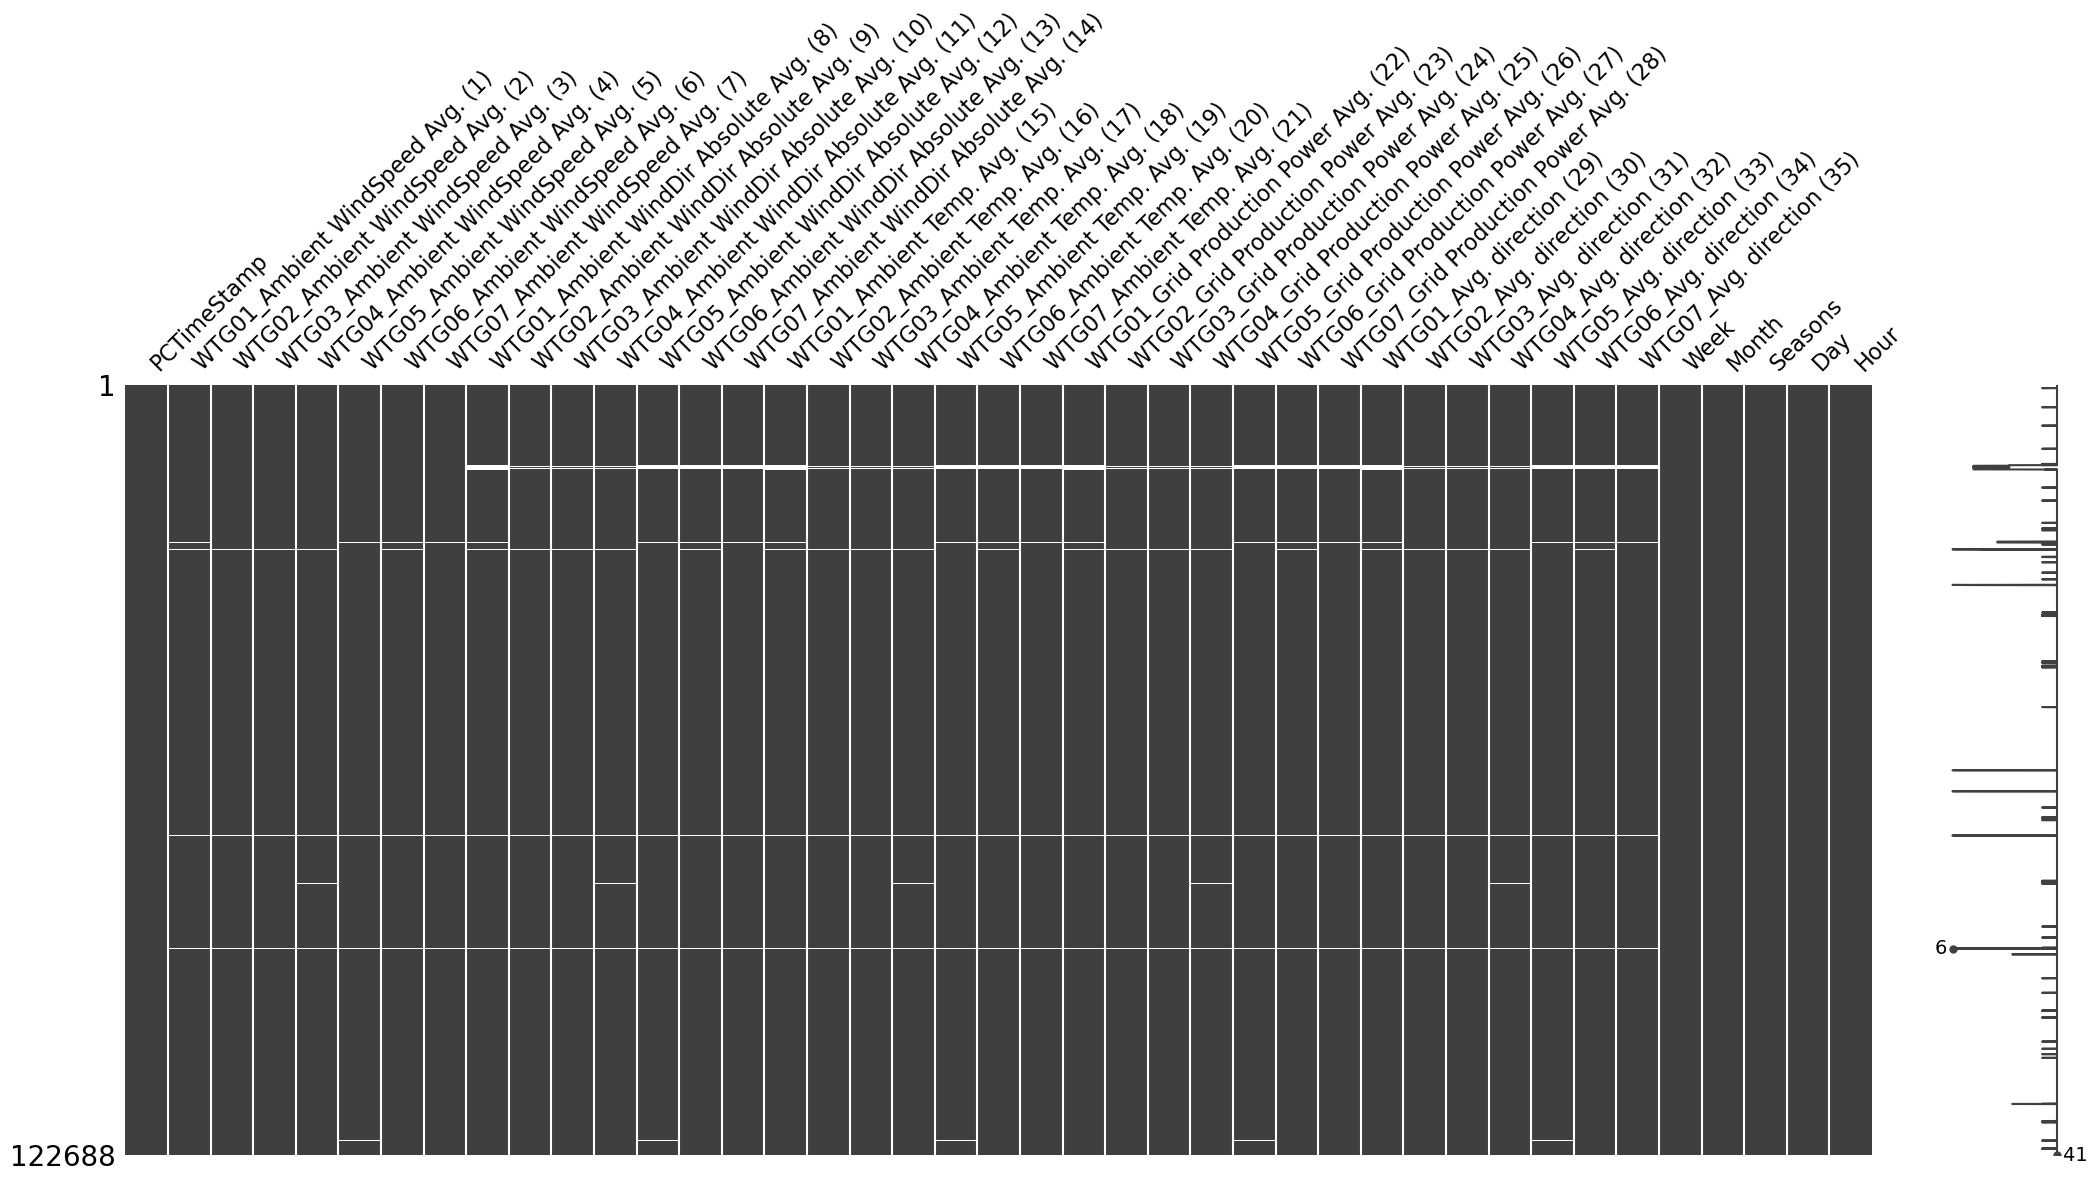

In [11]:
import missingno as msno
msno.matrix(dfs)

In [12]:
def count_missing_rows(data):
    # Count the number of missing values in each row
    missing_per_row = data.isnull().sum(axis=1)
    
    # Count the number of rows with missing values in a specific number of columns
    missing_counts = missing_per_row.value_counts().sort_index()
    
    return missing_counts

missing_counts = count_missing_rows(dfs)
print(missing_counts)

0     121067
4         14
5        434
8          4
10        23
15        15
16       240
20       164
24         3
25        51
28       435
30        10
35       228
Name: count, dtype: int64


In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer,KNNImputer

In [14]:
class ImputerMissingValue(TransformerMixin, BaseEstimator):
    """
    A class to impute missing values in a Pandas DataFrame using a combination of median, knn, and most frequent
    imputers on specified columns.

    Parameters:
    -----------
    median_cols : list of str, optional (default=None)
        Columns to impute missing values using the median imputer.
    knn_cols : list of str, optional (default=None)
        Columns to impute missing values using the KNN imputer.

    Returns:
    --------
    X_imputed : pandas.DataFrame
        A DataFrame with imputed missing values.
    """
    def __init__(self, median_cols=None, knn_cols=None):
        self.median_cols = median_cols
        self.knn_cols = knn_cols
    
    def fit(self, X, y=None):
        self.median_imputer = SimpleImputer(strategy='median')
        self.knn_imputer = KNNImputer()

        if self.median_cols is not None:
            self.median_imputer.fit(X[self.median_cols])
        if self.knn_cols is not None:
            self.knn_imputer.fit(X[self.knn_cols])
        return self
    
    def transform(self, X):
        X_imputed = X.copy()
        if self.median_cols is not None:
            X_median = pd.DataFrame(self.median_imputer.transform(X[self.median_cols]), 
                                    columns=self.median_cols, index=X.index)
            X_imputed = pd.concat([X_imputed.drop(self.median_cols, axis=1), X_median], axis=1)
        if self.knn_cols is not None:
            X_knn = pd.DataFrame(self.knn_imputer.transform(X[self.knn_cols]), 
                                 columns=self.knn_cols, index=X.index)
            X_imputed = pd.concat([X_imputed.drop(self.knn_cols, axis=1), X_knn], axis=1)
        return X_imputed
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [15]:
cols = dfs.columns

# KNN imputation
imputer = ImputerMissingValue(knn_cols=cols[1:-5])
dfs = imputer.fit_transform(dfs)

dfs

,PCTimeStamp,Week,Month,Seasons,Day,Hour,WTG01_Ambient WindSpeed Avg. (1),WTG02_Ambient WindSpeed Avg. (2),WTG03_Ambient WindSpeed Avg. (3),WTG04_Ambient WindSpeed Avg. (4),...,WTG05_Grid Production Power Avg. (26),WTG06_Grid Production Power Avg. (27),WTG07_Grid Production Power Avg. (28),WTG01_Avg. direction (29),WTG02_Avg. direction (30),WTG03_Avg. direction (31),WTG04_Avg. direction (32),WTG05_Avg. direction (33),WTG06_Avg. direction (34),WTG07_Avg. direction (35)
0,2022-01-01 00:00:00,1,1,Dry season,1,1,14.200,14.300,13.300,14.300,...,4097.300,4097.200,4095.400,0.100,327.900,322.500,331.600,341.500,328.500,333.300
1,2022-01-01 00:10:00,1,1,Dry season,1,1,15.300,14.600,13.400,14.300,...,4097.000,4095.500,4099.300,359.000,327.900,325.300,333.300,344.600,331.200,333.300
2,2022-01-01 00:20:00,1,1,Dry season,1,1,13.800,13.500,13.600,13.700,...,4091.700,4093.800,4091.800,2.200,330.900,328.400,333.300,344.500,331.200,336.300
3,2022-01-01 00:30:00,1,1,Dry season,1,1,14.100,14.900,14.900,15.000,...,4095.200,4092.000,4093.300,3.900,331.300,326.900,333.300,349.000,331.200,337.400
4,2022-01-01 00:40:00,1,1,Dry season,1,1,14.200,14.200,13.800,14.200,...,4088.300,4090.800,4084.700,1.900,330.900,326.900,333.300,343.800,331.200,335.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122683,2024-05-01 23:10:00,1,5,Rainy season,1,24,6.406,6.422,6.508,6.379,...,297.088,423.424,694.720,114.256,85.384,81.104,88.881,97.218,86.223,94.700
122684,2024-05-01 23:20:00,1,5,Rainy season,1,24,6.680,6.465,6.680,6.668,...,292.928,373.376,785.728,114.480,87.063,82.754,93.805,100.268,88.014,93.553
122685,2024-05-01 23:30:00,1,5,Rainy season,1,24,6.254,6.555,6.539,6.734,...,311.424,446.080,886.976,115.571,93.609,84.853,94.868,101.219,90.000,96.323
122686,2024-05-01 23:40:00,1,5,Rainy season,1,24,5.793,6.789,6.379,6.629,...,243.840,363.264,872.640,122.817,97.274,83.957,93.553,109.836,96.183,100.268


In [16]:
dfs.isnull().sum()

PCTimeStamp                                 0
Week                                        0
Month                                       0
Seasons                                     0
Day                                         0
Hour                                        0
WTG01_Ambient WindSpeed Avg. (1)            0
WTG02_Ambient WindSpeed Avg. (2)            0
WTG03_Ambient WindSpeed Avg. (3)            0
WTG04_Ambient WindSpeed Avg. (4)            0
WTG05_Ambient WindSpeed Avg. (5)            0
WTG06_Ambient WindSpeed Avg. (6)            0
WTG07_Ambient WindSpeed Avg. (7)            0
WTG01_Ambient WindDir Absolute Avg. (8)     0
WTG02_Ambient WindDir Absolute Avg. (9)     0
WTG03_Ambient WindDir Absolute Avg. (10)    0
WTG04_Ambient WindDir Absolute Avg. (11)    0
WTG05_Ambient WindDir Absolute Avg. (12)    0
WTG06_Ambient WindDir Absolute Avg. (13)    0
WTG07_Ambient WindDir Absolute Avg. (14)    0
WTG01_Ambient Temp. Avg. (15)               0
WTG02_Ambient Temp. Avg. (16)     

---
### 3. Smoothing data / Resampling

---
### 4. Stationarity

Some time-series models, such as such as ARIMA, assume that the underlying data is stationary. Stationarity describes that the time-series has

    - constant mean and mean is not time-dependent

    - constant variance and variance is not time-dependent
    
    - constant covariance and covariance is not time-dependent



The check for stationarity can be done via three different approaches:

    - 1.visually: plot time series and check for trends or seasonality

    - 2.basic statistics: split time series and compare the mean and variance of each partition
    
    - 3.statistical test: Augmented Dickey Fuller test

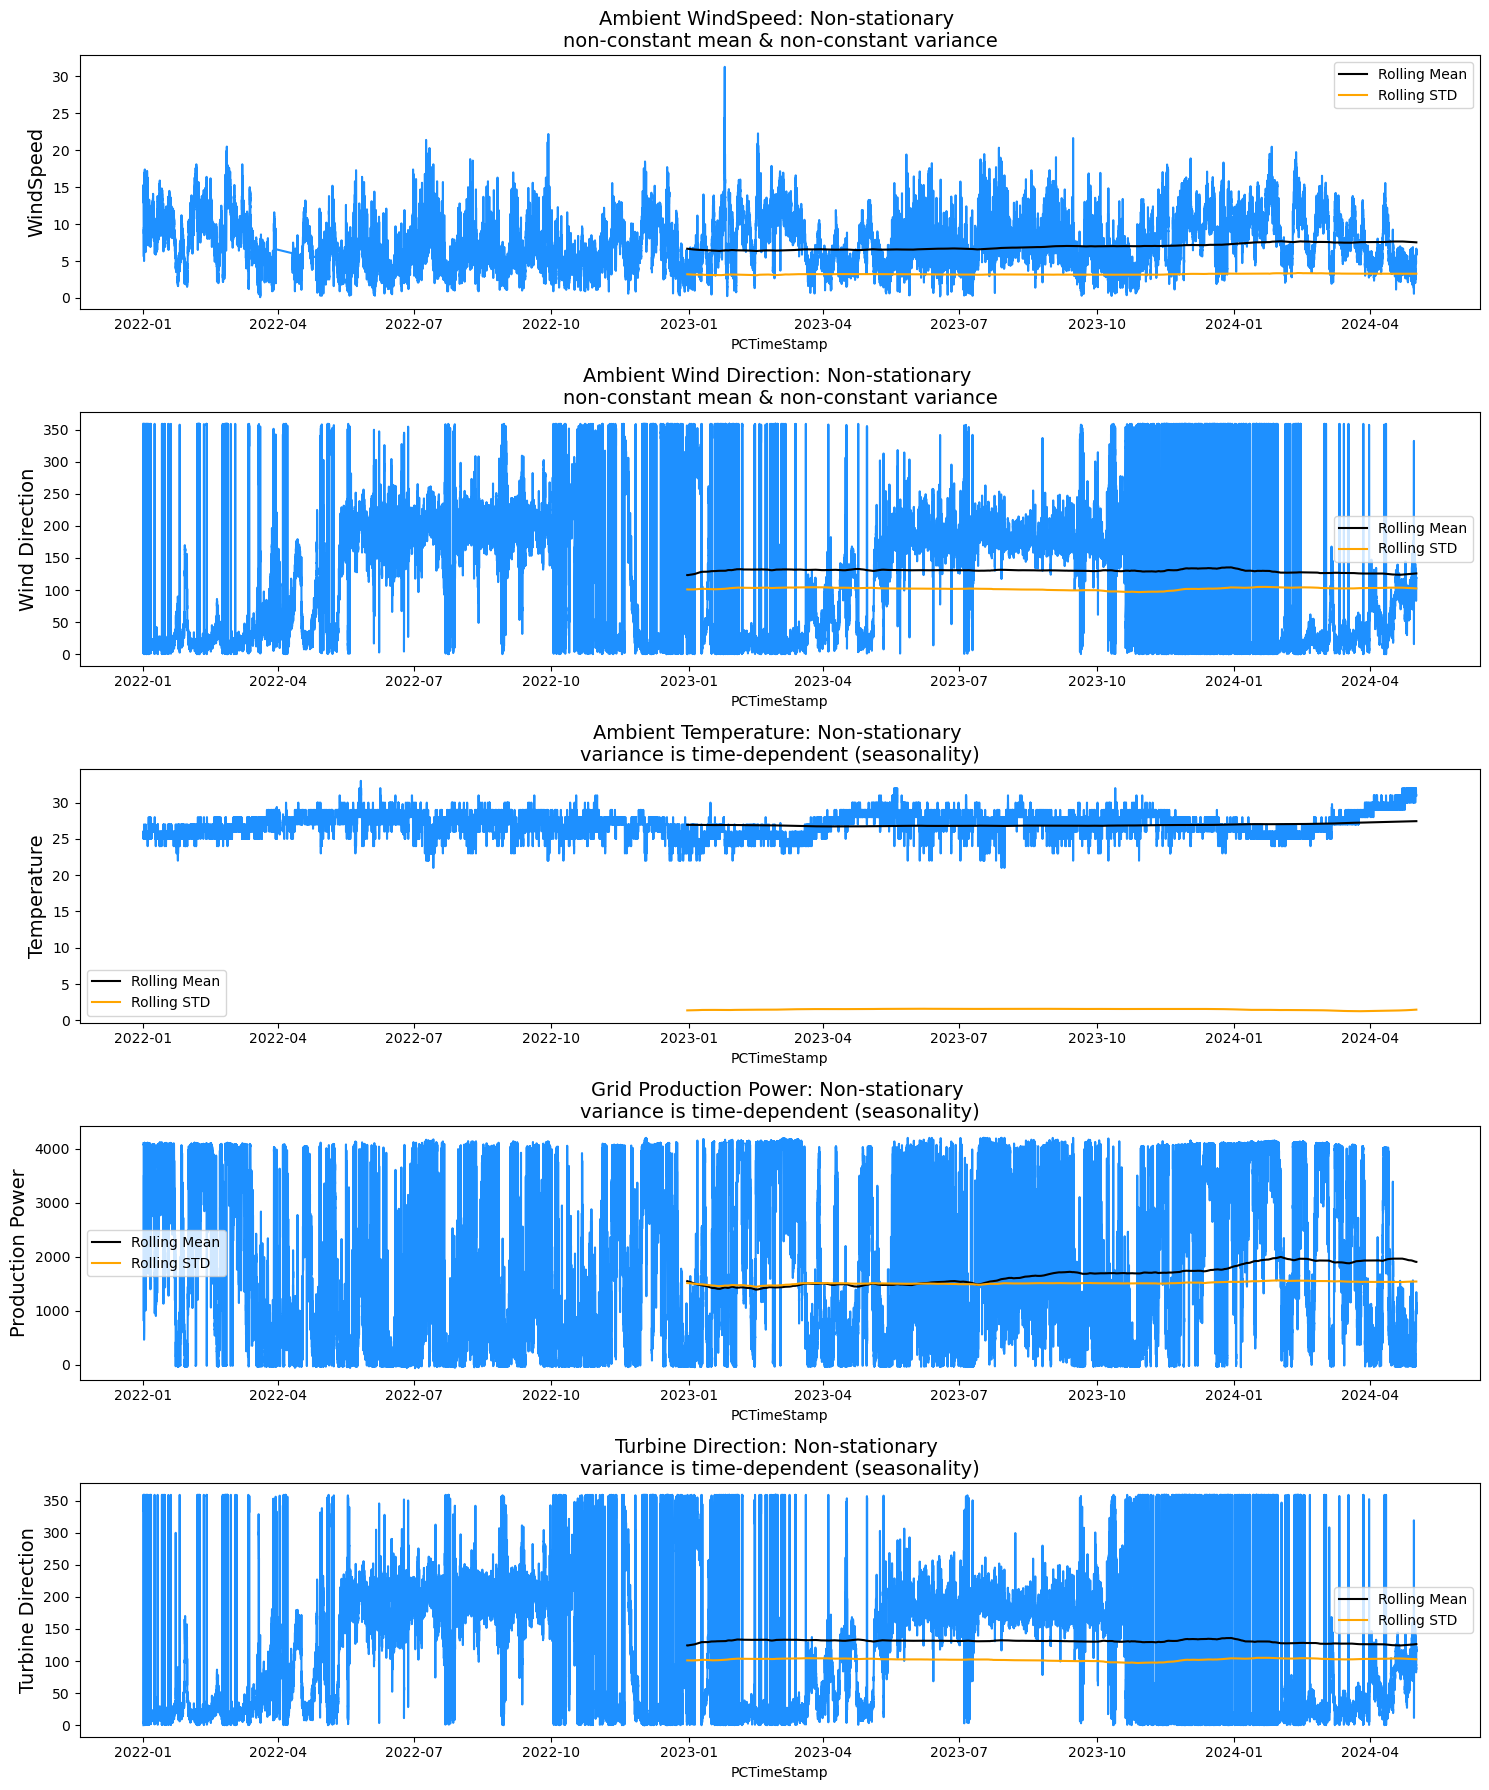

In [42]:
# Rolling window là 52 tuần (mỗi tuần có 7 ngày * 24 giờ * 6 lần mỗi giờ cho dữ liệu 10 phút)
rolling_window = 365 * 24 * 6

f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 18))

sns.lineplot(x=dfs['PCTimeStamp'], y=dfs['WTG01_Ambient WindSpeed Avg. (1)'], ax=ax[0], color='dodgerblue')
sns.lineplot(x=dfs['PCTimeStamp'], y=dfs['WTG01_Ambient WindSpeed Avg. (1)'].rolling(rolling_window).mean(), ax=ax[0], color='black', label='Rolling Mean')
sns.lineplot(x=dfs['PCTimeStamp'], y=dfs['WTG01_Ambient WindSpeed Avg. (1)'].rolling(rolling_window).std(), ax=ax[0], color='orange', label='Rolling STD')
ax[0].set_title('Ambient WindSpeed: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0].set_ylabel('WindSpeed', fontsize=14)


sns.lineplot(x=dfs['PCTimeStamp'], y=dfs['WTG01_Ambient WindDir Absolute Avg. (8)'], ax=ax[1], color='dodgerblue')
sns.lineplot(x=dfs['PCTimeStamp'], y=dfs['WTG01_Ambient WindDir Absolute Avg. (8)'].rolling(rolling_window).mean(), ax=ax[1], color='black', label='Rolling Mean')
sns.lineplot(x=dfs['PCTimeStamp'], y=dfs['WTG01_Ambient WindDir Absolute Avg. (8)'].rolling(rolling_window).std(), ax=ax[1], color='orange', label='Rolling STD')
ax[1].set_title('Ambient Wind Direction: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[1].set_ylabel('Wind Direction', fontsize=14)


sns.lineplot(x=dfs['PCTimeStamp'], y=dfs['WTG01_Ambient Temp. Avg. (15)'], ax=ax[2], color='dodgerblue')
sns.lineplot(x=dfs['PCTimeStamp'], y=dfs['WTG01_Ambient Temp. Avg. (15)'].rolling(rolling_window).mean(), ax=ax[2], color='black', label='Rolling Mean')
sns.lineplot(x=dfs['PCTimeStamp'], y=dfs['WTG01_Ambient Temp. Avg. (15)'].rolling(rolling_window).std(), ax=ax[2], color='orange', label='Rolling STD')
ax[2].set_title('Ambient Temperature: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[2].set_ylabel('Temperature', fontsize=14)


sns.lineplot(x=dfs['PCTimeStamp'], y=dfs['WTG01_Grid Production Power Avg. (22)'], ax=ax[3], color='dodgerblue')
sns.lineplot(x=dfs['PCTimeStamp'], y=dfs['WTG01_Grid Production Power Avg. (22)'].rolling(rolling_window).mean(), ax=ax[3], color='black', label='Rolling Mean')
sns.lineplot(x=dfs['PCTimeStamp'], y=dfs['WTG01_Grid Production Power Avg. (22)'].rolling(rolling_window).std(), ax=ax[3], color='orange', label='Rolling STD')
ax[3].set_title('Grid Production Power: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[3].set_ylabel('Production Power', fontsize=14)

sns.lineplot(x=dfs['PCTimeStamp'], y=dfs['WTG01_Avg. direction (29)'], ax=ax[4], color='dodgerblue')
sns.lineplot(x=dfs['PCTimeStamp'], y=dfs['WTG01_Avg. direction (29)'].rolling(rolling_window).mean(), ax=ax[4], color='black', label='Rolling Mean')
sns.lineplot(x=dfs['PCTimeStamp'], y=dfs['WTG01_Avg. direction (29)'].rolling(rolling_window).std(), ax=ax[4], color='orange', label='Rolling STD')
ax[4].set_title('Turbine Direction: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[4].set_ylabel('Turbine Direction', fontsize=14)

plt.tight_layout()
plt.show()

**Augmented Dickey-Fuller (ADF)** test is a type of statistical test called a unit root test. Unit roots are a cause for non-stationarity.

* **Null Hypothesis (H0)**: Time series has a unit root. (Time series is not stationary).

* **Alternate Hypothesis (H1)**: Time series has no unit root (Time series is stationary).

**If the null hypothesis can be rejected, we can conclude that the time series is stationary.**

There are two ways to rejects the null hypothesis:

On the one hand, the null hypothesis can be rejected if the p-value is below a set significance level. The defaults significance level is 5%

* <font color='red'>**p-value > significance level (default: 0.05)**</font>: Fail to reject the null hypothesis (H0), the data has a unit root and is <font color='red'>non-stationary</font>.
* <font color='green'>**p-value <= significance level (default: 0.05)**</font>: Reject the null hypothesis (H0), the data does not have a unit root and is <font color='green'>stationary</font>.
    
On the other hand, the null hypothesis can be rejects if the test statistic is less than the critical value.
* <font color='red'>**ADF statistic > critical value**</font>: Fail to reject the null hypothesis (H0), the data has a unit root and is <font color='red'>non-stationary</font>.
* <font color='green'>**ADF statistic < critical value**</font>: Reject the null hypothesis (H0), the data does not have a unit root and is <font color='green'>stationary</font>.

In [45]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(dfs['WTG01_Ambient WindSpeed Avg. (1)'].values)
result

(-13.253794229577693,
 8.66926552500163e-25,
 70,
 122617,
 {'1%': -3.4304033322206795,
  '5%': -2.861563572053899,
  '10%': -2.566782546571101},
 239009.44055027398)

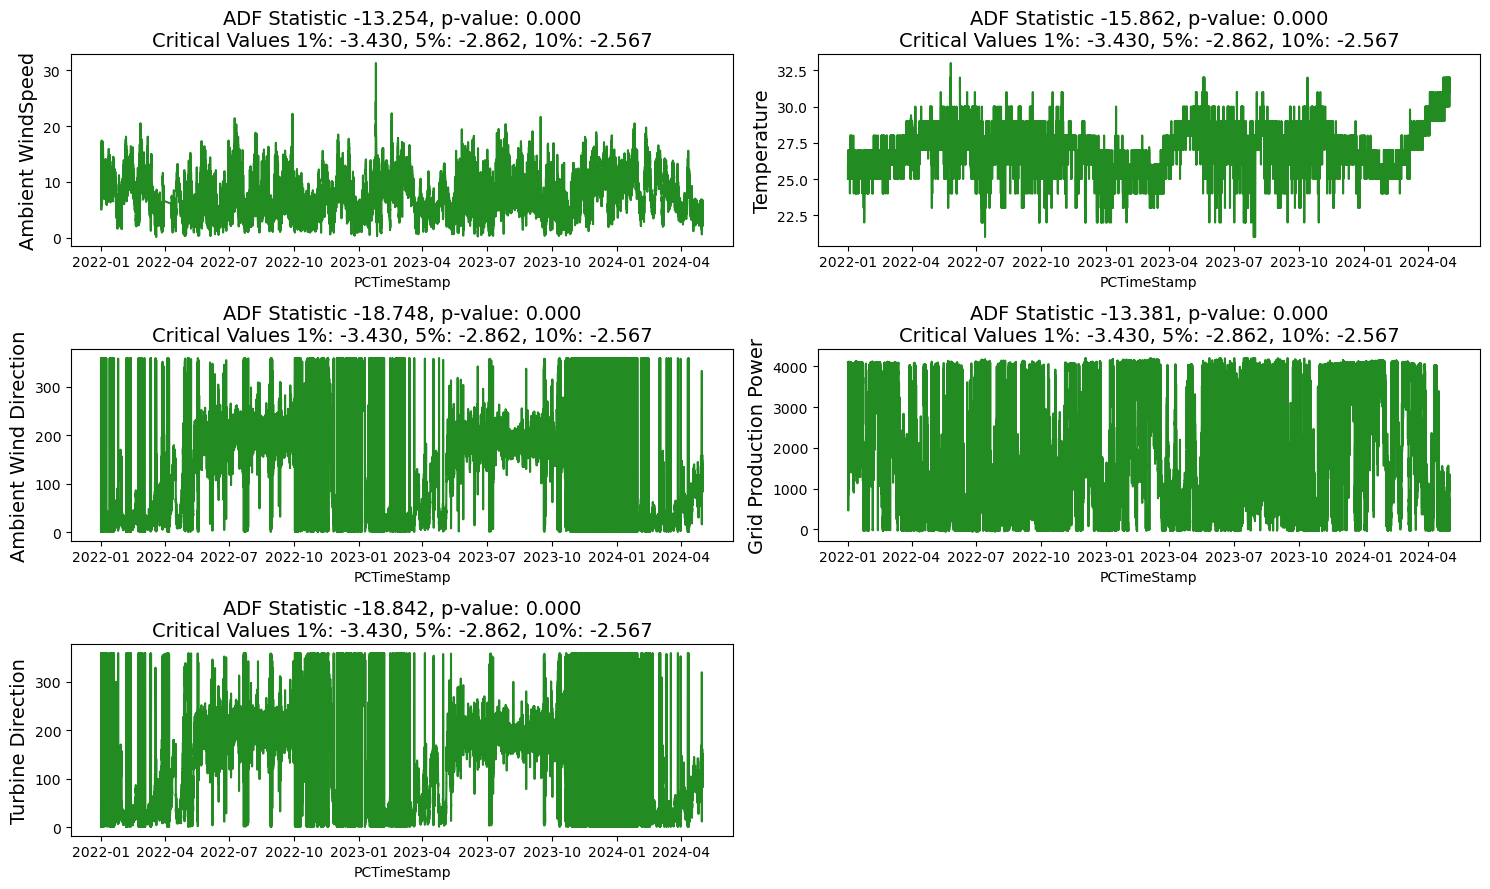

In [47]:
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=dfs['PCTimeStamp'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(dfs['WTG01_Ambient WindSpeed Avg. (1)'].values, 'Ambient WindSpeed', ax[0, 0])
visualize_adfuller_results(dfs['WTG01_Ambient WindDir Absolute Avg. (8)'].values, 'Ambient Wind Direction', ax[1, 0])
visualize_adfuller_results(dfs['WTG01_Ambient Temp. Avg. (15)'].values, 'Temperature', ax[0, 1])
visualize_adfuller_results(dfs['WTG01_Grid Production Power Avg. (22)'].values, 'Grid Production Power', ax[1, 1])
visualize_adfuller_results(dfs['WTG01_Avg. direction (29)'].values, 'Turbine Direction', ax[2, 0])

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  [
    'WTG02_Ambient WindSpeed Avg. (2)',
    'WTG01_Ambient WindDir Absolute Avg. (8)',
    'WTG01_Ambient Temp. Avg. (15)',
    'WTG01_Grid Production Power Avg. (22)',
    'WTG01_Avg. direction (29)'
]

for column in core_columns:
    decomp = seasonal_decompose(dfs[column], period=365*24*6, model='additive', extrapolate_trend='freq')
    dfs[f"{column}_trend"] = decomp.trend
    dfs[f"{column}_seasonal"] = decomp.seasonal

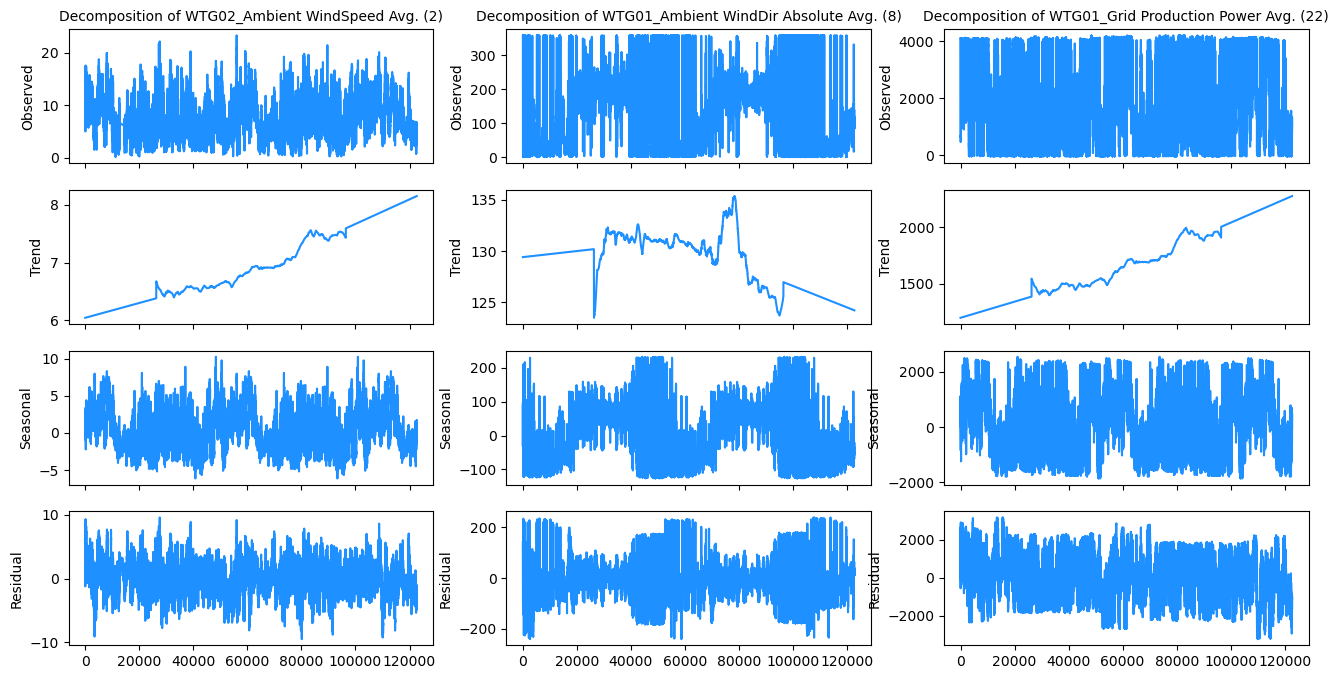

In [56]:
fig, ax = plt.subplots(ncols=3, nrows=4, sharex=True, figsize=(16, 8))

columns = [
    'WTG02_Ambient WindSpeed Avg. (2)',
    'WTG01_Ambient WindDir Absolute Avg. (8)',
    'WTG01_Grid Production Power Avg. (22)'
]

for i, column in enumerate(columns):
    res = seasonal_decompose(dfs[column], period=365*24*6, model='additive', extrapolate_trend='freq')

    ax[0, i].set_title('Decomposition of {}'.format(column), fontsize=10)
    res.observed.plot(ax=ax[0, i], legend=False, color='dodgerblue')
    ax[0, i].set_ylabel('Observed', fontsize=10)

    res.trend.plot(ax=ax[1, i], legend=False, color='dodgerblue')
    ax[1, i].set_ylabel('Trend', fontsize=10)

    res.seasonal.plot(ax=ax[2, i], legend=False, color='dodgerblue')
    ax[2, i].set_ylabel('Seasonal', fontsize=10)

    res.resid.plot(ax=ax[3, i], legend=False, color='dodgerblue')
    ax[3, i].set_ylabel('Residual', fontsize=10)

plt.show()

---
### 5.  

 An outlier in time series refers to a sudden peak or drop in the trend line. We are not concerned with the factors causing the outliers, but certainly, there can be multiple factors. We will keep ourselves confined with the detection of outliers

In [17]:
def check_negative_values(df):
    negative_values_per_column = (df < 0).sum()
    min_values_per_column = df[df < 0].min()
    result = pd.DataFrame({
        'Negative Count': negative_values_per_column,
        'Min Value': min_values_per_column
    })
    return result

negative_values_per_column = check_negative_values(dfs.iloc[:, 6:])
negative_values_per_column = negative_values_per_column[negative_values_per_column['Negative Count'] != 0]
print(negative_values_per_column)

                                       Negative Count  Min Value
WTG01_Grid Production Power Avg. (22)           11592      -62.9
WTG02_Grid Production Power Avg. (23)           11369      -56.1
WTG03_Grid Production Power Avg. (24)           10773      -56.9
WTG04_Grid Production Power Avg. (25)           12219      -46.3
WTG05_Grid Production Power Avg. (26)           12094      -64.1
WTG06_Grid Production Power Avg. (27)           11063      -64.5
WTG07_Grid Production Power Avg. (28)           12187      -64.8


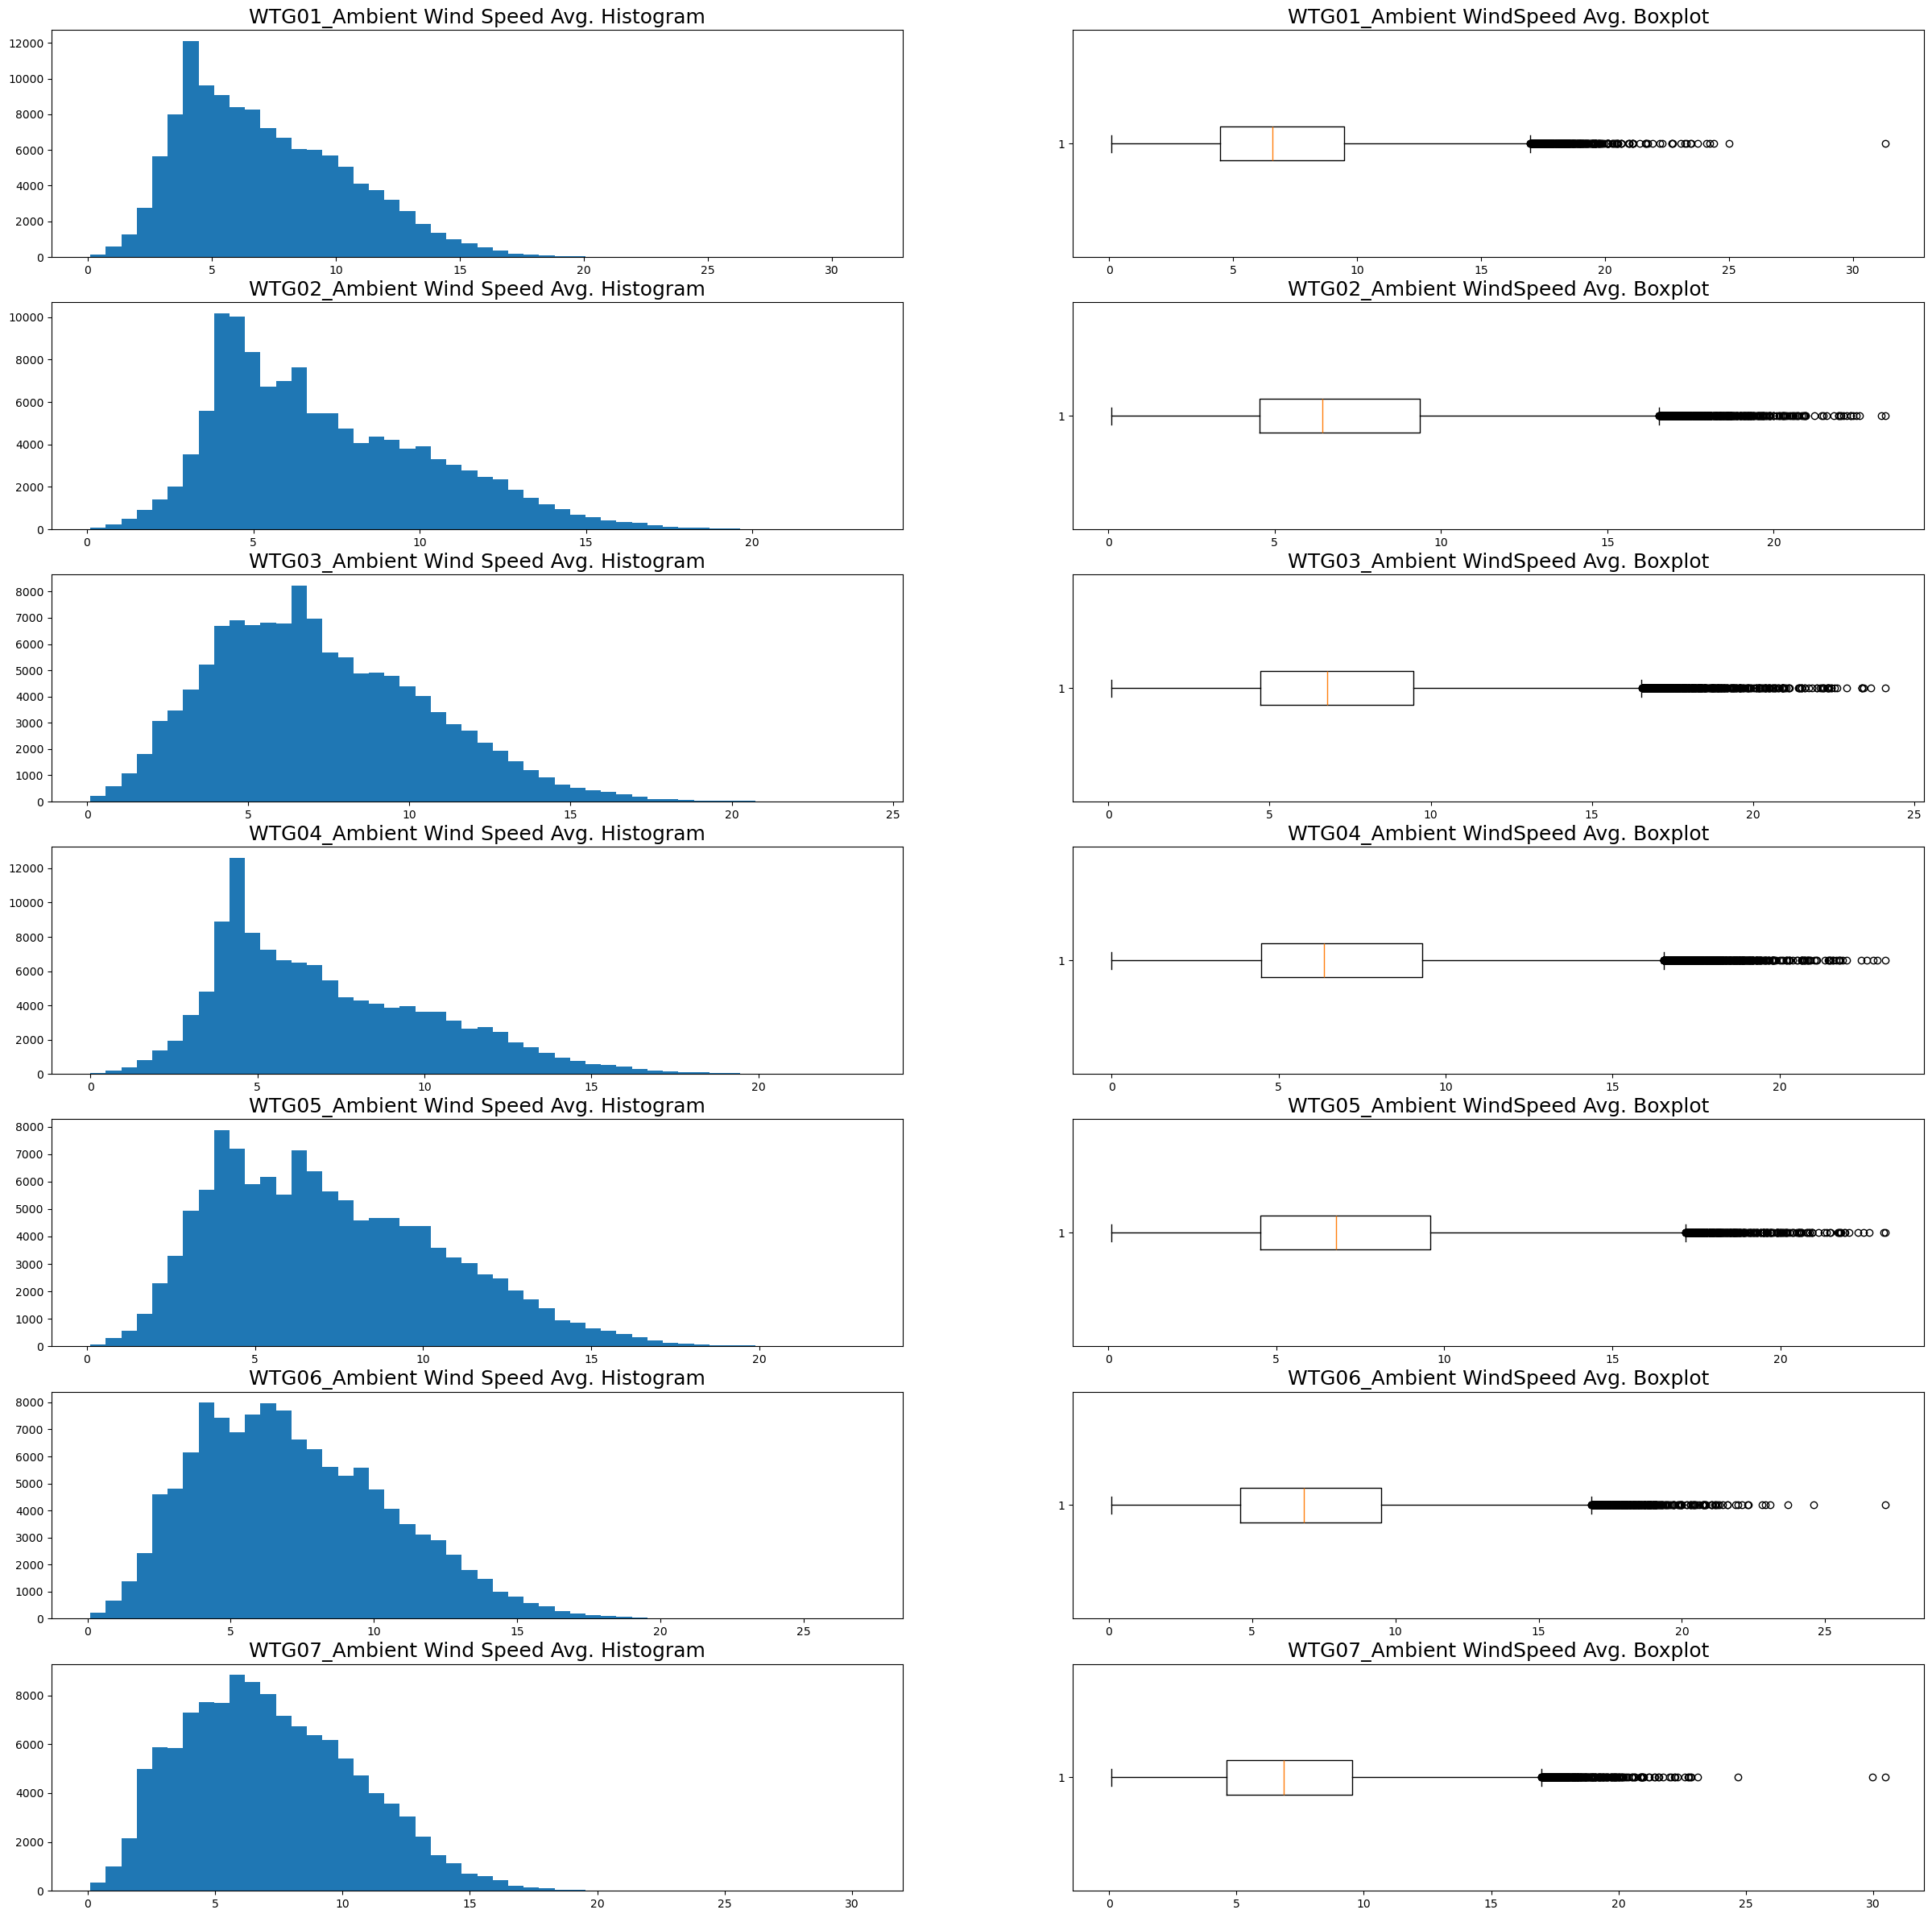

In [18]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(30, 30))

for i in range(7): 
    ax[i,0].hist(dfs[f'WTG0{i+1}_Ambient WindSpeed Avg. ({i+1})'], bins=50)
    ax[i,0].set_title(f'WTG0{i+1}_Ambient Wind Speed Avg. Histogram', fontsize=18)
    
    ax[i,1].boxplot(dfs[f'WTG0{i+1}_Ambient WindSpeed Avg. ({i+1})'],vert=False)
    ax[i,1].set_title(f'WTG0{i+1}_Ambient WindSpeed Avg. Boxplot', fontsize=18)

plt.show()

In [19]:
def display_outlier_info(df):
    info = []
    for i in range(1, 8):
        wind_speed_col = df.columns[i+5]
        power_production_col = df.columns[i+26]
        Q1 = df[wind_speed_col].quantile(0.25)
        Q3 = df[wind_speed_col].quantile(0.75)
        iqr = Q3 - Q1
        lower_threshold = Q1 - 1.5 * iqr
        upper_threshold = Q3 + 1.5 * iqr
        outliers = df[(df[wind_speed_col] < lower_threshold) | (df[wind_speed_col] > upper_threshold)]
        num_outliers = outliers.shape[0]
        avg_power_production = outliers[power_production_col].mean()
        max_power_production = outliers[power_production_col].max()
        min_power_production = outliers[power_production_col].min()
        info.append([wind_speed_col, Q1, Q3, lower_threshold, upper_threshold, num_outliers, avg_power_production, max_power_production, min_power_production])
    info_df = pd.DataFrame(info, columns=['Turbine', 'Quantile (0.25)', 'Quantile (0.75)', 'Lower threshold', 'Upper threshold', 'Number of Outliers', 'Avg Power Production on Outliers', 'Max Power Production on Outliers', 'Min Power Production on Outliers'])
    return info_df

info_df = display_outlier_info(dfs)
display(info_df)


,Turbine,Quantile (0.25),Quantile (0.75),Lower threshold,Upper threshold,Number of Outliers,Avg Power Production on Outliers,Max Power Production on Outliers,Min Power Production on Outliers
0,WTG01_Ambient WindSpeed Avg. (1),4.480,9.477,-3.0155,16.9725,512,3401.345508,4177.216,-27.800
1,WTG02_Ambient WindSpeed Avg. (2),4.551,9.352,-2.6505,16.5535,770,3913.981548,4200.192,-24.900
2,WTG03_Ambient WindSpeed Avg. (3),4.723,9.453,-2.3720,16.5480,760,3886.134216,4200.128,-10.560
3,WTG04_Ambient WindSpeed Avg. (4),4.477,9.300,-2.7575,16.5345,831,3905.443995,4200.128,0.000
4,WTG05_Ambient WindSpeed Avg. (5),4.527,9.586,-3.0615,17.1745,417,3803.923520,4198.976,-28.700
5,WTG06_Ambient WindSpeed Avg. (6),4.600,9.500,-2.7500,16.8500,548,3902.334139,4200.064,-37.600
6,WTG07_Ambient WindSpeed Avg. (7),4.600,9.543,-2.8145,16.9575,408,3823.328804,4147.300,-35.136


So instead of erasing the outliers, I am going to set the wind speed as Upper threshold for those observations.

---
## **Custom Transformers & Pipeline**

In [20]:
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, RobustScaler

In [21]:
# class OutlierThresholdTransformer(BaseEstimator, TransformerMixin):
#     def __init__(self, column, q1=0.25, q3=0.75):
#         self.column = column
#         self.q1 = q1
#         self.q3 = q3
#     def outlier_threshhold(self, dataframe, column):
#         Q1 = dataframe[column].quantile(self.q1)
#         Q3 = dataframe[column].quantile(self.q3)
#         iqr = Q3 - Q1
#         up_limit = Q3 + 1.5 * iqr
#         low_limit = Q1 - 1.5 * iqr
#         return low_limit, up_limit

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         X_copy = X.copy()
#         for col in self.column:
#             low_limit, up_limit = self.outlier_threshhold(X_copy, col)
#             X_copy.loc[(X_copy[col] < low_limit), col] = low_limit
#             X_copy.loc[(X_copy[col] > up_limit), col] = up_limit
#         return X_copy

#     def fit_transform(self, X, y=None):
#         return self.transform(X)

In [22]:
class CustomOneHotEncoder(BaseEstimator, TransformerMixin):
    """
    A transformer class to apply one-hot encoding to specified columns in a Pandas DataFrame. (mã hoá đối tượng object thành 0-1)

    Parameters
    ----------
    columns : list
        A list of column names to encode.

    Returns
    -------
    pandas.DataFrame
        A new DataFrame with the specified columns one-hot encoded.
    """
    def __init__(self, columns=None):
        self.columns = columns
        self.unique_values = {} 
        self.feature_names_ = None

    def fit(self, X, y=None):
        if self.columns is None:
            self.columns = X.columns.tolist() 
        self.unique_values = {col: X[col].unique() for col in self.columns}
        self.feature_names_ = self._get_feature_names()
        return self
    def _get_feature_names(self):
        feature_names = []
        for col in self.columns:
            for value in self.unique_values[col]:
                feature_names.append(f"{col}_{value}")
        return feature_names
    def transform(self, X):
        X_transformed = pd.DataFrame(index=X[self.columns].index)
                                     
        for col in self.columns:
            for value in self.unique_values[col]:
                X_transformed[f"{col}_{value}"] = (X[col] == value).astype(int)
        
        X = pd.concat([X, X_transformed], axis=1)
        return X.drop(columns=['Seasons'])
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [23]:
class StandardScaleTransform(BaseEstimator, TransformerMixin):
    """
    A transformer class to apply standard scaling to specified columns in a Pandas DataFrame.

    Parameters
    ----------
    cols : list of str
        The names of the columns to apply standard scaling to.
    """
    def __init__(self, cols):
        self.cols = cols
        self.scaler_ = None

    def fit(self, X, y=None):
        self.scaler_ = StandardScaler().fit(X.loc[:, self.cols])
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy.loc[:, self.cols] = self.scaler_.transform(X_copy.loc[:, self.cols])
        return X_copy

    def fit_transform(self, X, y=None):
        self.scaler_ = StandardScaler().fit(X.loc[:, self.cols])
        return self.transform(X)

In [24]:
class DropColumnsTransformer(BaseEstimator, TransformerMixin):
    """
    A transformer that drops specified columns from a DataFrame.

    Parameters
    ----------
    columns : list
        A list of column names to be dropped.
    return
    ------
        dataframe with dropped columns
    """
    def __init__(self, columns=None):
        self.columns = columns
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if self.columns is None:
            return X
        else:
            return X.drop(self.columns,axis=1)

In [25]:
from sklearn.pipeline import Pipeline

class FullPipeline1(BaseEstimator, TransformerMixin):
    """
    Một quy trình tiền xử lý hoàn chỉnh cho dữ liệu, bao gồm mã hóa nhãn,
    imputer missing value, chuẩn hóa và loại bỏ cột.
    
    Tham số
    ----------
    date_cols : list của str, mặc định=['Date/Time']
        Các cột chứa thông tin ngày tháng.
    numerical_cols : list của str, mặc định=None
        Các cột số để điền giá trị thiếu, loại bỏ giá trị ngoại lai và chuẩn hóa.
    MLE_cols : list của str, mặc định=None
        Các cột phân loại để mã hóa nhãn.
    """

    def __init__(self, date_cols = None, numerical_cols = None, MLE_cols = None):
        self.date_cols = date_cols
        self.numerical_cols = numerical_cols if numerical_cols is not None else []
        self.MLE_cols = MLE_cols if MLE_cols is not None else []
        
        self.full_pipeline = Pipeline([
            ('label_encode', CustomOneHotEncoder(columns=self.MLE_cols)),
            # ('impute_num',ImputerMissingValue(knn_cols=self.numerical_cols)),
            # ('remove_outlier', OutlierThresholdTransformer(column=self.numerical_cols)),
            ('scale', StandardScaleTransform(cols=self.numerical_cols)),
            ('drop', DropColumnsTransformer(columns=self.date_cols)),
        ])
    
    def fit(self, X, y=None):
        self.full_pipeline.fit(X, y)
        return self
    
    def transform(self, X):
        return self.full_pipeline.transform(X)
    
    def fit_transform(self, X, y=None):
        return self.full_pipeline.fit_transform(X, y)

---
## **PREDICT PRODUCTION POWER** 
---

### *Use the results of the first 9 months to predict the last 3 months*

In [26]:
dfs_turbine = dfs.copy()
turbine_dfs = {}

for i in range(1, 8):
    columns = [f'WTG0{i}_Ambient WindSpeed Avg. ({i})',
               f'WTG0{i}_Ambient WindDir Absolute Avg. ({i+7})',
               f'WTG0{i}_Ambient Temp. Avg. ({i+14})',
               f'WTG0{i}_Grid Production Power Avg. ({i+21})',
               f'WTG0{i}_Avg. direction ({i+28})']
    columns = ['PCTimeStamp', 'Week', 'Month', 'Seasons', 'Day', 'Hour'] + columns
    turbine_dfs[f'dfs_turbine{i}'] = dfs_turbine[columns]

    # Remove the 'Temp' column
    turbine_dfs[f'dfs_turbine{i}'] = turbine_dfs[f'dfs_turbine{i}'].drop(columns=[f'WTG0{i}_Ambient Temp. Avg. ({i+14})'])
    
    grid_prod = turbine_dfs[f'dfs_turbine{i}'].pop(f'WTG0{i}_Grid Production Power Avg. ({i+21})')
    turbine_dfs[f'dfs_turbine{i}'][f'WTG0{i}_Grid Production Power Avg. ({i+21})'] = grid_prod

dfs_turbine1, dfs_turbine2, dfs_turbine3, dfs_turbine4, dfs_turbine5, dfs_turbine6, dfs_turbine7 = [turbine_dfs[f'dfs_turbine{i}'] for i in range(1, 8)]

In [27]:
dfs_turbine1

,PCTimeStamp,Week,Month,Seasons,Day,Hour,WTG01_Ambient WindSpeed Avg. (1),WTG01_Ambient WindDir Absolute Avg. (8),WTG01_Avg. direction (29),WTG01_Angular Deviation Avg.,WTG01_Grid Production Power Avg. (22)
0,2022-01-01 00:00:00,1,1,Dry season,1,1,14.200,359.000,0.100,1.100,4098.800
1,2022-01-01 00:10:00,1,1,Dry season,1,1,15.300,1.100,359.000,2.100,4094.800
2,2022-01-01 00:20:00,1,1,Dry season,1,1,13.800,3.000,2.200,0.800,4092.900
3,2022-01-01 00:30:00,1,1,Dry season,1,1,14.100,4.200,3.900,0.300,4088.500
4,2022-01-01 00:40:00,1,1,Dry season,1,1,14.200,2.300,1.900,0.400,4089.800
...,...,...,...,...,...,...,...,...,...,...,...
122683,2024-05-01 23:10:00,1,5,Rainy season,1,24,6.406,116.970,114.256,2.714,1197.440
122684,2024-05-01 23:20:00,1,5,Rainy season,1,24,6.680,116.494,114.480,2.014,1344.640
122685,2024-05-01 23:30:00,1,5,Rainy season,1,24,6.254,118.284,115.571,2.713,1116.608
122686,2024-05-01 23:40:00,1,5,Rainy season,1,24,5.793,119.963,122.817,2.854,937.728


---
### Split Data

In [28]:
from sklearn.model_selection import train_test_split

def split_data(dataframe, turbine_number):
    df = dataframe.copy()
    column_to_drop = f'WTG0{turbine_number}_Grid Production Power Avg. ({turbine_number + 21})'

    df_train, df_test = train_test_split(df, test_size=0.2, shuffle=False, stratify=None)

    X_train = df_train.drop(columns=column_to_drop)
    y_train = df_train[column_to_drop]
    X_test = df_test.drop(columns=column_to_drop)
    y_test = df_test[column_to_drop]

    return X_train, X_test, y_train, y_test

# Use the function
split_data(dfs_turbine2, 2)

(              PCTimeStamp  Week  Month     Seasons  Day  Hour  \
 0     2022-01-01 00:00:00     1      1  Dry season    1     1   
 1     2022-01-01 00:10:00     1      1  Dry season    1     1   
 2     2022-01-01 00:20:00     1      1  Dry season    1     1   
 3     2022-01-01 00:30:00     1      1  Dry season    1     1   
 4     2022-01-01 00:40:00     1      1  Dry season    1     1   
 ...                   ...   ...    ...         ...  ...   ...   
 98145 2023-11-13 13:30:00     2     11  Dry season   13    14   
 98146 2023-11-13 13:40:00     2     11  Dry season   13    14   
 98147 2023-11-13 13:50:00     2     11  Dry season   13    14   
 98148 2023-11-13 14:00:00     2     11  Dry season   13    15   
 98149 2023-11-13 14:10:00     2     11  Dry season   13    15   
 
        WTG02_Ambient WindSpeed Avg. (2)  \
 0                                14.300   
 1                                14.600   
 2                                13.500   
 3                            

---
### Pipeline Transform

In [29]:
def pipeline_transform(dataframe, turbine_number):
    X_train, X_test, y_train, y_test = split_data(dataframe,turbine_number)
    f1 = FullPipeline1(
        date_cols=['PCTimeStamp'],
        numerical_cols=['Week', 'Month', 'Hour', 'Day'] + [col for col in X_train.columns if 'Avg.' in col],
        MLE_cols=['Seasons']
    )
    X_train_f1 = f1.fit_transform(X_train)
    X_test_f1 = f1.transform(X_test)
    return X_train_f1, X_test_f1, y_train, y_test

X_train_f1, X_test_f1, y_train, y_test = pipeline_transform(dfs_turbine1, 1)
X_train_f1

,Week,Month,Day,Hour,WTG01_Ambient WindSpeed Avg. (1),WTG01_Ambient WindDir Absolute Avg. (8),WTG01_Avg. direction (29),WTG01_Angular Deviation Avg.,Seasons_Dry season,Seasons_Rainy season
0,-1.395555,-1.576405,-1.651898,-1.660828,2.332313,2.388124,-1.322567,-0.161719,1,0
1,-1.395555,-1.576405,-1.651898,-1.660828,2.679084,-1.305281,2.376891,-0.060958,1,0
2,-1.395555,-1.576405,-1.651898,-1.660828,2.206215,-1.285673,-1.300921,-0.191947,1,0
3,-1.395555,-1.576405,-1.651898,-1.660828,2.300789,-1.273290,-1.283398,-0.242327,1,0
4,-1.395555,-1.576405,-1.651898,-1.660828,2.332313,-1.292897,-1.304013,-0.232251,1,0
...,...,...,...,...,...,...,...,...,...,...
98145,-0.622592,1.476967,-0.289773,0.217320,1.971357,2.368713,2.344824,-0.148620,1,0
98146,-0.622592,1.476967,-0.289773,0.217320,1.876468,2.388062,-1.314950,-0.086652,1,0
98147,-0.622592,1.476967,-0.289773,0.217320,1.580767,-1.284301,-1.286975,-0.230236,1,0
98148,-0.622592,1.476967,-0.289773,0.361793,1.733661,-1.288336,-1.305147,-0.176631,1,0


---
### Modeling

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#Create and train a Random Forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)


In [30]:
model.fit(X_train_f1, y_train)

feature_importance = model.feature_importances_
#Create a DataFrame to associate feature names with their importances
feature_importance_df=pd.DataFrame({'Feature':X_train_f1.columns,'Importance':feature_importance})
#Sort feature by importance
feature_importance_df=feature_importance_df.sort_values(by='Importance',ascending=False)

feature_importance_df

,Feature,Importance
4,WTG01_Ambient WindSpeed Avg. (1),0.955136
7,WTG01_Angular Deviation Avg.,0.010584
2,Day,0.008099
6,WTG01_Avg. direction (29),0.006491
5,WTG01_Ambient WindDir Absolute Avg. (8),0.006384
3,Hour,0.005712
1,Month,0.005370
0,Week,0.001565
8,Seasons_Dry season,0.000367
9,Seasons_Rainy season,0.000292


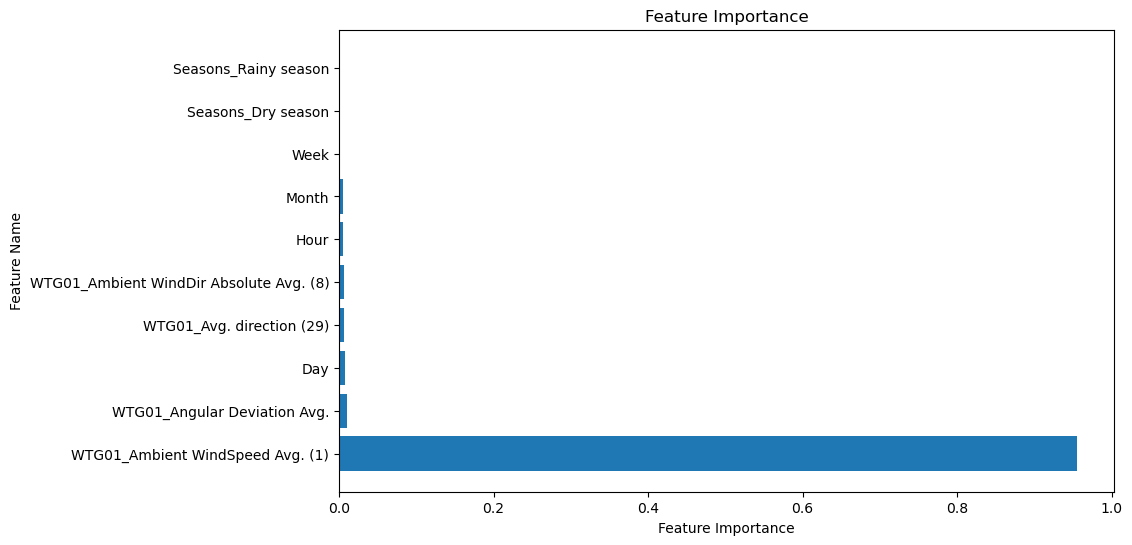

In [31]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance')
plt.show()

**Comments:**

    Nếu RMSE nhỏ hơn hoặc gần bằng std(y_test), điều này ngụ ý rằng mô hình dự đoán có thể dự đoán giá trị thực tế với độ chính xác tương đối tốt, và sự chênh lệch giữa giá trị dự đoán và giá trị thực tế không lớn hơn sự biến thiên tự nhiên của dữ liệu.
    
    Nếu RMSE lớn hơn std(y_test), điều này có thể ngụ ý rằng mô hình dự đoán có sự chệch lệch lớn hơn so với sự biến thiên tự nhiên của dữ liệu, và có thể cần phải cải thiện mô hình hoặc xem xét các yếu tố khác gây ra sự chệch lệch này.

In [33]:
from sklearn.metrics import r2_score, mean_squared_error

turbines = [dfs_turbine1, dfs_turbine2, dfs_turbine3, dfs_turbine4, dfs_turbine5, dfs_turbine6, dfs_turbine7]
results = {f'Turbine {i+1}': {'R2 Score': [], 'RMSE': [], 'STD': []} for i in range(len(turbines))}

for i, dfs_turbine in enumerate(turbines):
    dfs_turbine_denoise = dfs_turbine.copy()
    X_train, X_test, y_train, y_test = pipeline_transform(dfs_turbine_denoise, i+1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    std = y_test.std()
    
    results[f'Turbine {i+1}']['R2 Score'].append(r2)
    results[f'Turbine {i+1}']['RMSE'].append(rmse)
    results[f'Turbine {i+1}']['STD'].append(std)

# Create DataFrame from results dictionary
results_df = pd.DataFrame({turbine: metrics for turbine, metrics in results.items()})

# Transpose the DataFrame to have turbines as rows and metrics as columns
results_df = results_df.transpose()
results_df

,R2 Score,RMSE,STD
Turbine 1,[0.9354806460320391],[406.11579965009344],[1598.8721222467273]
Turbine 2,[0.9682408614411138],[284.4801539228073],[1596.3439360677728]
Turbine 3,[0.961854615114497],[308.25696661447597],[1578.3406774267562]
Turbine 4,[0.9576406573375483],[329.221459551753],[1599.6404572427193]
Turbine 5,[0.9572630926925085],[334.06801384864605],[1616.0031359746672]
Turbine 6,[0.9673533018138603],[289.7553633329307],[1603.6910332062166]
Turbine 7,[0.9620076911287739],[316.93155706914234],[1626.022273208]


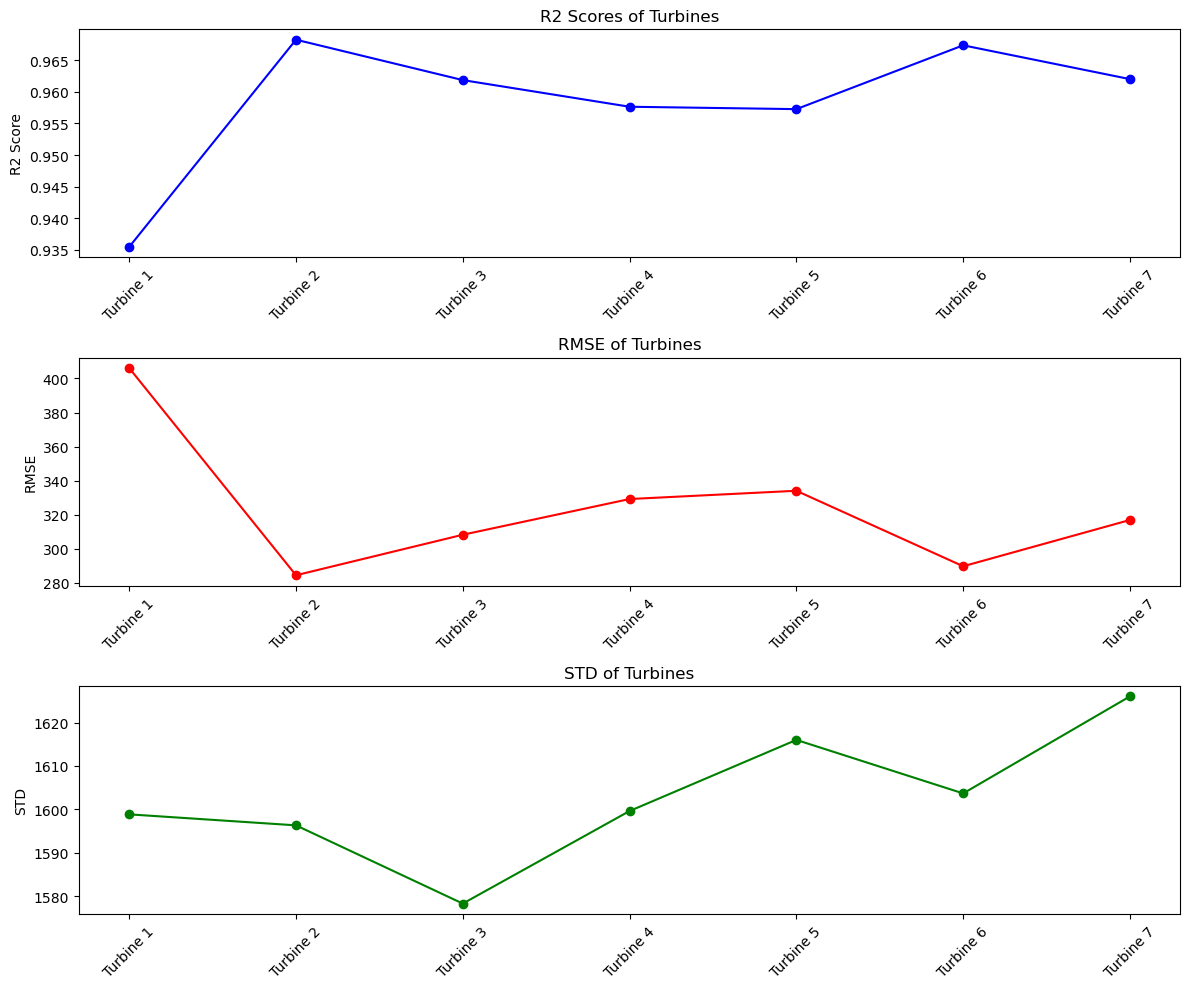

In [35]:
# Extracting the metrics for plotting
r2_scores = results_df['R2 Score'].apply(lambda x: x[0])
rmses = results_df['RMSE'].apply(lambda x: x[0])
stds = results_df['STD'].apply(lambda x: x[0])

# Plotting R2 scores
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.plot(r2_scores, marker='o', linestyle='-', color='b')
plt.title('R2 Scores of Turbines')
plt.ylabel('R2 Score')
plt.xticks(range(len(r2_scores)), results_df.index, rotation=45)

# Plotting RMSE
plt.subplot(3, 1, 2)
plt.plot(rmses, marker='o', linestyle='-', color='r')
plt.title('RMSE of Turbines')
plt.ylabel('RMSE')
plt.xticks(range(len(rmses)), results_df.index, rotation=45)

# Plotting STD
plt.subplot(3, 1, 3)
plt.plot(stds, marker='o', linestyle='-', color='g')
plt.title('STD of Turbines')
plt.ylabel('STD')
plt.xticks(range(len(stds)), results_df.index, rotation=45)

plt.tight_layout()
plt.show()